# Lecture 3

For this lecture, we needed [numpy](https://numpy.org/) and [matplotlib](https://matplotlib.org/stable/index.html) only. 
So make sure you have an understanding about what these are. See the documentations, they can  be useful later on.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's create a signal: 
$$x[n]=\{...,0,0,2,2,2,\mathbf{0},1,2,3,4,0,0,...\}$$
$$\hspace{2.1em}\uparrow$$

For this we will heavily utilize Python's property of negative indices. Let's see how this goes.

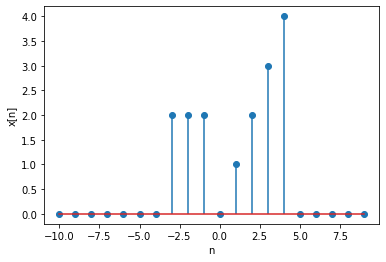

In [2]:
n = np.arange(-10, 10)
x = np.zeros_like(n)
nonzero_indices = np.arange(-3,5) # Bear in mind that -3:5 will not work similar to Matlab. Try it out.
x[nonzero_indices] = [2,2,2,0,1,2,3,4]
plt.stem(n,x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

It's important to use $n$ as indices. Let's see how the array $x$ looks like without the indices. 

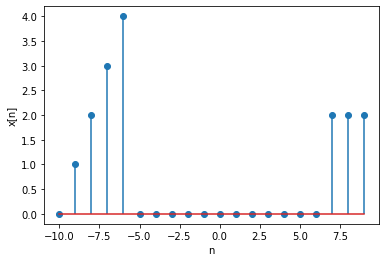

In [3]:
plt.stem(n,x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

Now, let's see a time shift by two to right. The corresponding signal should be:
$$y[n] = x[n-2]$$

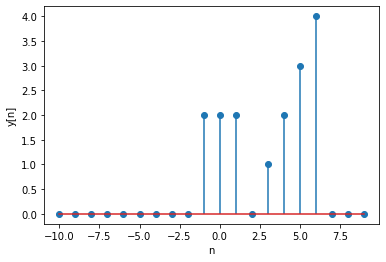

In [4]:
y = np.zeros_like(n) # To address y as y[n], I first need to initialize it as an array. Otherwise I will be calling a nonexistent array.
y[n] = x[n-2]
plt.stem(n,y[n])
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

Now, let's see a time folding and shift. Note that $y[-n] = x[-n-2]$. 

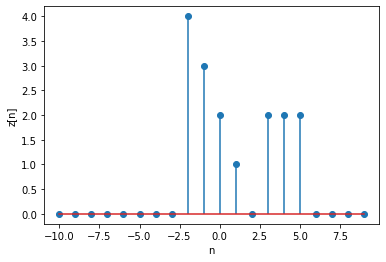

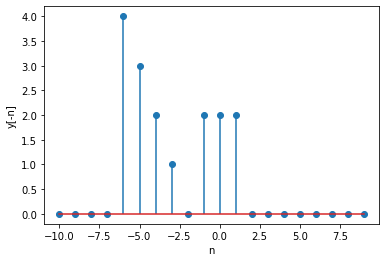

In [5]:
z = np.zeros_like(n)
z[n] = x[-n+2]
plt.stem(n,z[n])
plt.xlabel('n')
plt.ylabel('z[n]')
plt.show()

plt.stem(n,y[-n])
plt.xlabel('n')
plt.ylabel('y[-n]')
plt.show()


Now, let's see some resampling. We will resample with $N=2$. 

I will first get even time indices and call $x$ with these. For this, let's see a way to call only some elements of an array with masking.

In [6]:
print(n%2==0) # Observe the mask
print(n[n%2==0]) # Observe the array addressed with the mask.

[ True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False]
[-10  -8  -6  -4  -2   0   2   4   6   8]


Now let's see our new signal $w[n] = x[2n]$:

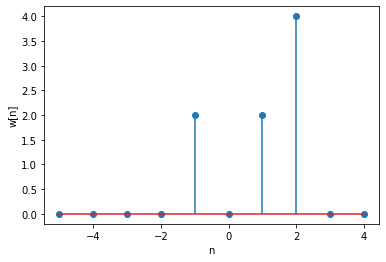

In [7]:
mask = n%2==0
n_new = n[mask]//2 # After resampling, my array will be half the size. Thus I create a new time index array. `//`` is integer division.
w = np.zeros_like(n_new)
w[n_new] = x[n[mask]]
plt.stem(n_new, w[n_new])
plt.xlabel('n')
plt.ylabel('w[n]')
plt.show()